# Random Forest

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
# leemos nuestra data
data = pd.read_csv("../data/external/Student_performance_data _.csv")

In [95]:
data.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [96]:
# nuestra variable objetivo
y = data.GradeClass
# nuestros features
students_features = [
    'StudyTimeWeekly',
    'Absences',
    'Tutoring',
    'ParentalSupport',
    'Extracurricular',
    'GPA'
]
X = data[students_features]

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 1)

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
y_preds = forest_model.predict(val_X)

In [100]:
print("El Mea de nuestro modelo es: ")
print(mean_absolute_error(val_y, y_preds))

print("Los valores de nuestra variable objetivo van de: ")
print(val_y.min(), val_y.max())

El Mea de nuestro modelo es: 
0.2740969899665552
Los valores de nuestra variable objetivo van de: 
0.0 4.0


In [101]:
import shap

In [102]:
explainer = shap.Explainer(forest_model)

In [103]:
shap_values = explainer.shap_values(val_X)

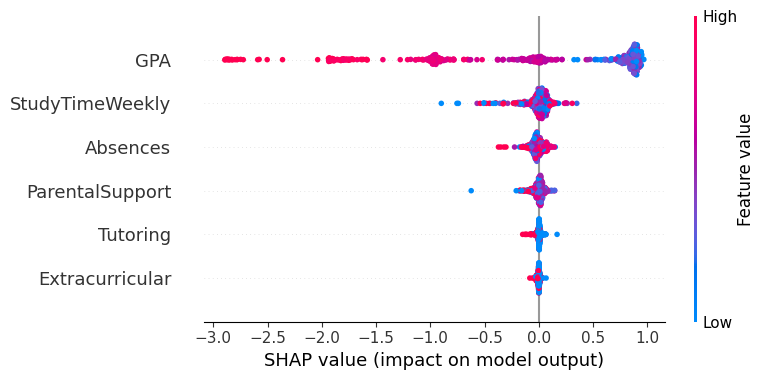

In [104]:
shap.summary_plot(shap_values, val_X)

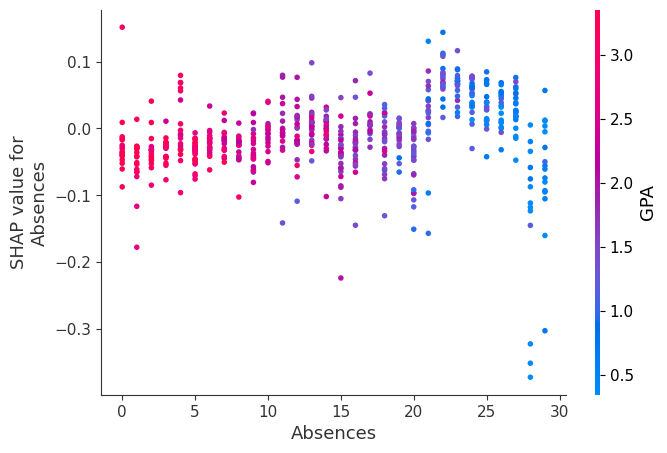

In [106]:
shap.dependence_plot("Absences", shap_values, val_X,interaction_index="GPA")

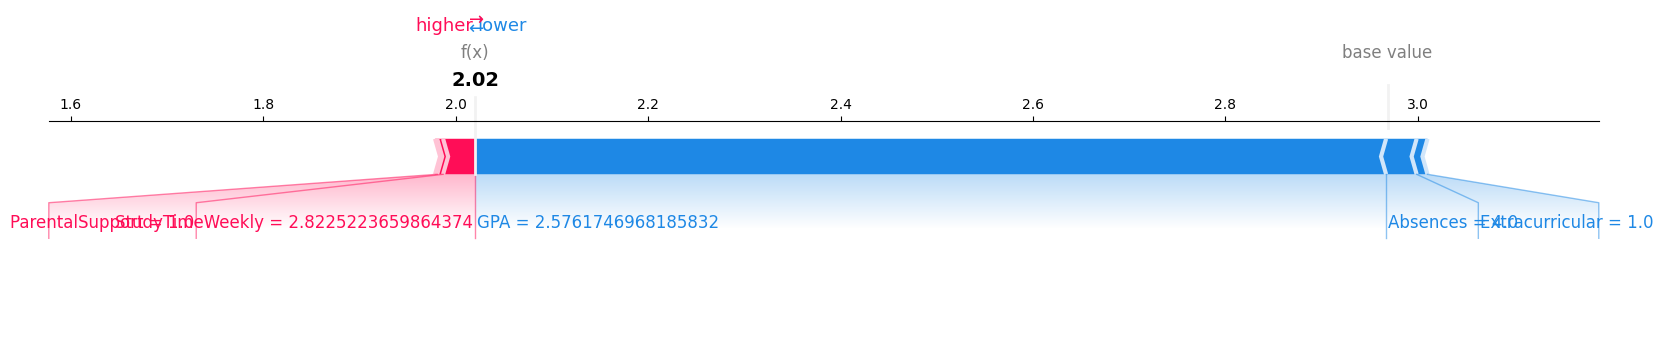

In [108]:
shap.plots.force(explainer.expected_value[0], shap_values[0], val_X.iloc[0, :], matplotlib = True)